X shape: (237, 28, 28)
y shape: (237,)


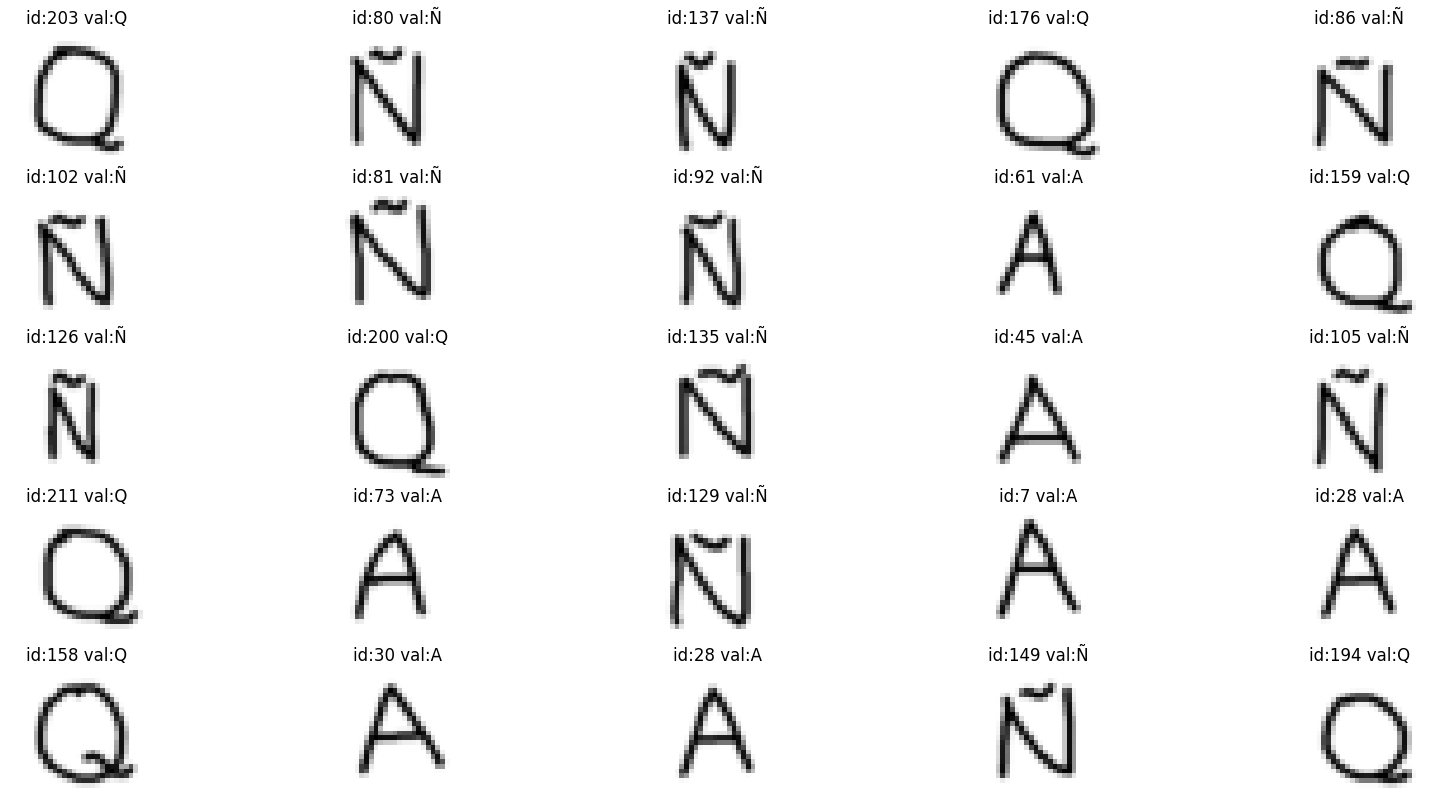

In [5]:
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#PREPROCESAMIENTO DE LAS IMÁGENES .png
# Cargar
X_raw = np.load('X.npy', allow_pickle=True)
y = np.load('y.npy', allow_pickle=True)

# Normalizar
X_raw = X_raw.astype('float32') / 255.0

# Ajustar tamaño a 28x28
size = (28,28)
X = []
for x in X_raw:
    X.append(resize(x, size, preserve_range=True))
X = np.array(X)

print("X shape:", X.shape)
print("y shape:", y.shape)

# -Mostrar ejemplos-
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()


In [6]:
#ENTRENAMIENTO

class_mapping = {'A':0, 'Ñ':1, 'Q':2}
y_num = np.array([class_mapping[str(label)] for label in y])
X = X[..., None]

X_train, X_test, y_train, y_test = train_test_split(
    X, y_num, test_size=0.2, random_state=42, stratify=y_num)
print(X_train.shape, X_test.shape)



(189, 28, 28, 1) (48, 28, 28, 1)


In [7]:
#Modelo B
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

size = (28,28)
bs = 16
lr = 1e-4

model_b = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*size,1)),
    MaxPool2D(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model_b.compile(optimizer=SGD(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.summary()

history_b = model_b.fit(X_train, y_train, validation_data=(X_test, y_test),
                        batch_size=bs, epochs=100, verbose=2)
model_b.save('model_B_only_dataset.h5')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,643 (940.01 KB)

 Trainable params: 240,643 (940.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/12 - 3s - 280ms/step - accuracy: 0.3386 - loss: 1.0976 - val_accuracy: 0.3333 - val_loss: 1.0996
Epoch 2/100
12/12 - 1s - 91ms/step - accuracy: 0.3386 - loss: 1.0972 - val_accuracy: 0.3333 - val_loss: 1.0992
Epoch 3/100
12/12 - 1s - 56ms/step - accuracy: 0.3386 - loss: 1.0967 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 4/100
12/12 - 1s - 58ms/step - accuracy: 0.3386 - loss: 1.0962 - val_accuracy: 0.3333 - val_loss: 1.0983
Epoch 5/100
12/12 - 1s - 53ms/step - accuracy: 0.3386 - loss: 1.0958 - val_accuracy: 0.3333 - val_loss: 1.0979
Epoch 6/100
12/12 - 1s - 117ms/step - accuracy: 0.3386 - loss: 1.0953 - val_accuracy: 0.3333 - val_loss: 1.0974
Epoch 7/100
12/12 - 1s - 106ms/step - accuracy: 0.3386 - loss: 1.0949 - val_accuracy: 0.3333 - val_loss: 1.0970
Epoch 8/100
12/12 - 1s - 66ms/step - accuracy: 0.3386 - loss: 1.0944 - val_accuracy: 0.3333 - val_loss: 1.0966
Epoch 9/100
12/12 - 1s - 73ms/step - accuracy: 0.3386 - loss: 1.0940 - val_accuracy: 0.3333 - val_loss: 1.096

In [9]:
#Modelo A
from tensorflow.keras.datasets import mnist

# 1) Cargar MNIST (pre-training)
(Xm, ym), _ = mnist.load_data()
Xm = Xm.astype('float32') / 255.0
Xm = Xm[..., None]

model_mnist = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_mnist.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mnist.fit(Xm, ym, batch_size=128, epochs=3, validation_split=0.1)  # entrenamiento ligero

# 2) Remover última capa y añadir salida para 3 clases
from tensorflow.keras import Model, layers

# take outputs up to penultimate Dense(128)
base = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
])

base = Sequential(model_mnist.layers[:-1])  # todas las capas excepto la última Dense(10)


for layer in base.layers:
    layer.trainable = False

# nuevo modelo
from tensorflow.keras import Input
inp = Input(shape=(28,28,1))
x = inp
for layer in base.layers:
    x = layer(x)
x = Dense(3, activation='softmax')(x)
model_a = Model(inputs=inp, outputs=x)

model_a.compile(optimizer=SGD(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_a.summary()

# 3) Fine-tune dataset
history_a = model_a.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=2)
model_a.save('model_A_transfer.h5')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 52s 123ms/step - accuracy: 0.4338 - loss: 1.9388 - val_accuracy: 0.8983 - val_loss: 0.3687
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 52s 123ms/step - accuracy: 0.8863 - loss: 0.3884 - val_accuracy: 0.9403 - val_loss: 0.2153
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 123ms/step - accuracy: 0.9225 - loss: 0.2605 - val_accuracy: 0.9537 - val_loss: 0.1690


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,243 (1.20 MB)

 Trainable params: 387 (1.51 KB)

 Non-trainable params: 313,856 (1.20 MB)

Epoch 1/50
12/12 - 1s - 81ms/step - accuracy: 0.3069 - loss: 2.3653 - val_accuracy: 0.3750 - val_loss: 1.9443
Epoch 2/50
12/12 - 0s - 22ms/step - accuracy: 0.3439 - loss: 1.3963 - val_accuracy: 0.4375 - val_loss: 1.1522
Epoch 3/50
12/12 - 0s - 22ms/step - accuracy: 0.5079 - loss: 0.8578 - val_accuracy: 0.5208 - val_loss: 0.8344
Epoch 4/50
12/12 - 0s - 23ms/step - accuracy: 0.6931 - loss: 0.6893 - val_accuracy: 0.6250 - val_loss: 0.7302
Epoch 5/50
12/12 - 0s - 26ms/step - accuracy: 0.7778 - loss: 0.6230 - val_accuracy: 0.6250 - val_loss: 0.6753
Epoch 6/50
12/12 - 0s - 25ms/step - accuracy: 0.8148 - loss: 0.5818 - val_accuracy: 0.6875 - val_loss: 0.6368
Epoch 7/50
12/12 - 0s - 25ms/step - accuracy: 0.8624 - loss: 0.5489 - val_accuracy: 0.7500 - val_loss: 0.6021
Epoch 8/50
12/12 - 0s - 25ms/step - accuracy: 0.8677 - loss: 0.5216 - val_accuracy: 0.8125 - val_loss: 0.5735
Epoch 9/50
12/12 - 0s - 19ms/step - accuracy: 0.8836 - loss: 0.4948 - val_accuracy: 0.8333 - val_loss: 0.5482
Epoch 10/5

A_transfer - Loss: 0.2359, Acc: 0.9792
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
              precision    recall  f1-score   support

           A       1.00      0.94      0.97        16
           Ñ       0.94      1.00      0.97        15
           Q       1.00      1.00      1.00        17

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



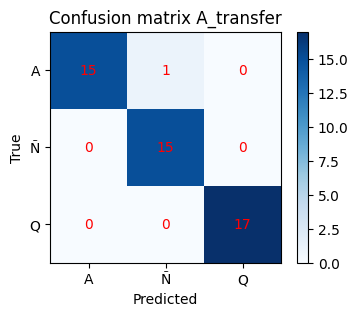

B_only_dataset - Loss: 1.0643, Acc: 0.6667
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
              precision    recall  f1-score   support

           A       0.50      1.00      0.67        16
           Ñ       0.00      0.00      0.00        15
           Q       1.00      0.94      0.97        17

    accuracy                           0.67        48
   macro avg       0.50      0.65      0.55        48
weighted avg       0.52      0.67      0.57        48



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


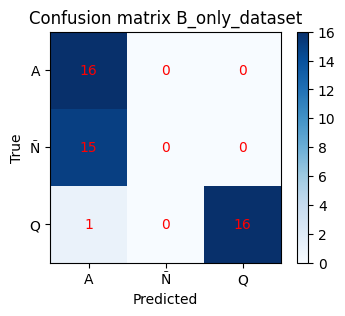

In [10]:
#EVALUACIÓN MATRIZ DE FUSIÓN, F1
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar modelos
for name, model in [('A_transfer', model_a), ('B_only_dataset', model_b)]:
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} - Loss: {loss:.4f}, Acc: {acc:.4f}")
    preds = model.predict(X_test)
    y_pred = np.argmax(preds, axis=1)
    print(classification_report(y_test, y_pred, target_names=['A','Ñ','Q']))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    plt.title(f'Confusion matrix {name}')
    plt.imshow(cm, cmap='Blues')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks([0,1,2], ['A','Ñ','Q'])
    plt.yticks([0,1,2], ['A','Ñ','Q'])
    for i in range(3):
        for j in range(3):
            plt.text(j, i, cm[i,j], ha='center', va='center', color='red')
    plt.show()


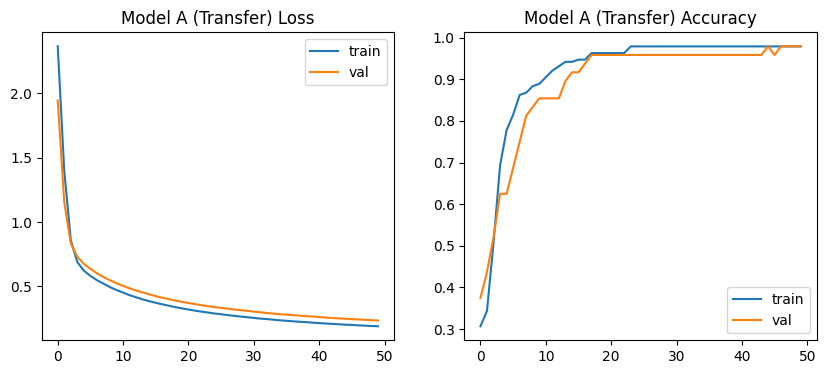

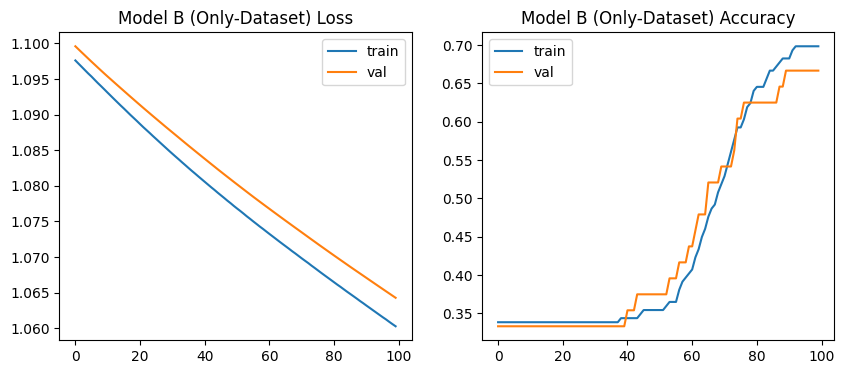

In [12]:
#EVALUACIÓN curva de entrenamiento

def plot_history(h, title=''):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(h.history['loss'], label='train')
    plt.plot(h.history['val_loss'], label='val')
    plt.title(title + ' Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(h.history['accuracy'], label='train')
    plt.plot(h.history['val_accuracy'], label='val')
    plt.title(title + ' Accuracy')
    plt.legend()
    plt.show()

plot_history(history_a, 'Model A (Transfer)')
plot_history(history_b, 'Model B (Only-Dataset)')


In [20]:
#PRUEBAS DE LOS MODELOS
import matplotlib.pyplot as plt
import numpy as np

def test_visual(model_a, model_b, X_test, y_test, idx=None):
    id_to_label = {0: 'A', 1: 'Ñ', 2: 'Q'}

    # Escoger índice aleatorio si no se pasa uno
    if idx is None:
        idx = np.random.choice(X_test.shape[0])

    im = X_test[idx]
    true_label = id_to_label[y_test[idx]]

    # Predicciones
    outA = model_a.predict(im[None,...])[0]
    outB = model_b.predict(im[None,...])[0]

    predA = id_to_label[outA.argmax()]
    predB = id_to_label[outB.argmax()]

    # ----- Visualización -----
    plt.figure(figsize=(12,4))

    # Imagen original
    plt.subplot(1,3,1)
    plt.imshow(-im[:,:,0], cmap='gray')
    plt.title(f"Letra dibujada\n(verdadero: {true_label})")
    plt.axis('off')

    # Predicción Modelo A
    plt.subplot(1,3,2)
    plt.bar(['A','Ñ','Q'], outA, color=['blue','green','purple'])
    plt.ylim([0,1])
    plt.title(f"Modelo A (Transfer)\nPredicción: {predA}")
    plt.ylabel("Probabilidad")

    # Predicción Modelo B
    plt.subplot(1,3,3)
    plt.bar(['A','Ñ','Q'], outB, color=['red','orange','cyan'])
    plt.ylim([0,1])
    plt.title(f"Modelo B (only dataset)\nPredicción: {predB}")
    plt.ylabel("Probabilidad")

    plt.tight_layout()
    plt.show()

    # Mensaje interpretado (para el informe)
    print("=====================================")
    print("Letra dibujada por el usuario:", true_label)
    print("Modelo A predice:", predA, "-- Confiabilidad:", outA.max())
    print("Modelo B predice:", predB, "-- Confiabilidad:", outB.max())
    print("=====================================")

    if predA == true_label:
        print("Modelo A reconoce correctamente la letra dibujada.")
    else:
        print("Modelo A falla en esta muestra (inusual).")

    if predB == true_label:
        print("Modelo B reconoce la letra (poco frecuente).")
    else:
        print("Modelo B no reconoce la letra dibujada.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


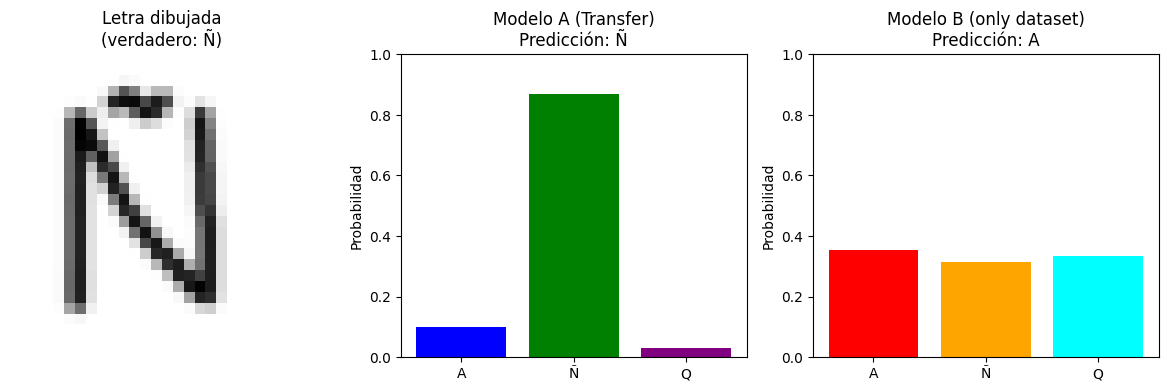

Letra dibujada por el usuario: Ñ
Modelo A predice: Ñ -- Confiabilidad: 0.86830324
Modelo B predice: A -- Confiabilidad: 0.3524861
Modelo A reconoce correctamente la letra dibujada.
Modelo B no reconoce la letra dibujada.


In [21]:
test_visual(model_a, model_b, X_test, y_test)
